In [2]:
import tensorflow as tf
import numpy as np

In [3]:
import cv2

In [4]:
import os

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
def create_unet(width,height):
  WIDTH=width
  HEIGHT=height

  input=tf.keras.layers.Input((HEIGHT,WIDTH,3))
  x=tf.keras.layers.Lambda(lambda y: y/255)(input)
  DROP_OUT=0.2

  c1=tf.keras.layers.Conv2D(16,3,activation="relu",padding="same")(x)
  d1=tf.keras.layers.Dropout(DROP_OUT)(c1)
  c2=tf.keras.layers.Conv2D(16,3,activation="relu",padding="same")(d1)
  p1=tf.keras.layers.MaxPooling2D((2,2))(c2)

  c3=tf.keras.layers.Conv2D(32,3,activation="relu",padding="same")(p1)
  d2=tf.keras.layers.Dropout(DROP_OUT)(c3)
  c4=tf.keras.layers.Conv2D(32,3,activation="relu",padding="same")(d2)
  p2=tf.keras.layers.MaxPooling2D((2,2))(c4)

  c5=tf.keras.layers.Conv2D(64,3,activation="relu",padding="same")(p2)
  d3=tf.keras.layers.Dropout(DROP_OUT)(c5)
  c6=tf.keras.layers.Conv2D(64,3,activation="relu",padding="same")(d3)
  p3=tf.keras.layers.MaxPooling2D((2,2))(c6)

  c7=tf.keras.layers.Conv2D(128,3,activation="relu",padding="same")(p3)
  d4=tf.keras.layers.Dropout(DROP_OUT)(c7)
  c8=tf.keras.layers.Conv2D(128,3,activation="relu",padding="same")(d4)
  p4=tf.keras.layers.MaxPooling2D((2,2))(c8)

  c9=tf.keras.layers.Conv2D(256,3,activation="relu",padding="same")(p4)
  d5=tf.keras.layers.Dropout(DROP_OUT)(c9)
  c10=tf.keras.layers.Conv2D(256,3,activation="relu",padding="same")(d5)
  u5=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2))(c10)
  u5=tf.keras.layers.Concatenate()([u5,c8])



  c11=tf.keras.layers.Conv2D(128,3,activation="relu",padding="same")(u5)
  d6=tf.keras.layers.Dropout(DROP_OUT)(c11)
  c12=tf.keras.layers.Conv2D(128,3,activation="relu",padding="same")(d6)
  u6=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2))(c12)
  u6=tf.keras.layers.Concatenate()([u6,c6])

  c13=tf.keras.layers.Conv2D(64,3,activation="relu",padding="same")(u6)
  d7=tf.keras.layers.Dropout(DROP_OUT)(c13)
  c14=tf.keras.layers.Conv2D(64,3,activation="relu",padding="same")(d7)
  u7=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2))(c14)
  u7=tf.keras.layers.Concatenate()([u7,c4])

  c15=tf.keras.layers.Conv2D(32,3,activation="relu",padding="same")(u7)
  d8=tf.keras.layers.Dropout(DROP_OUT)(c15)
  c16=tf.keras.layers.Conv2D(32,3,activation="relu",padding="same")(d8)
  u8=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2))(c16)
  u8=tf.keras.layers.Concatenate()([u8,c2])

  c17=tf.keras.layers.Conv2D(16,3,activation="relu",padding="same")(u8)
  d9=tf.keras.layers.Dropout(DROP_OUT)(c17)
  c18=tf.keras.layers.Conv2D(16,3,activation="relu",padding="same")(d9)


  outputs=tf.keras.layers.Conv1D(1,1,activation="sigmoid")(c18)

  model=tf.keras.Model(inputs=[input],outputs=[outputs])
  model.summary()
  return model

In [7]:
def change_mask_to_bw(path):
  print(path)
  img = cv2.imread(path)
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  (thresh, im_bw) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  return im_bw

In [34]:
def prepare_dataset(width,height,X_path,Y_path=None):
  
  for (root ,dirs,files) in os.walk(X_path):
    X=np.zeros((len(files),height,width,3),dtype=np.uint8)
    y=np.zeros((len(files),height,width,1),dtype=np.uint8)
    index=0
    for file in files:
      image_num=file.split(".")[0]
      image_y_name=image_num+"_mask.png"
      path_x=os.path.join(X_path,file)
      if Y_path:
        path_y=os.path.join(Y_path,image_y_name)
        img_y=change_mask_to_bw(path_y)
        img_y=cv2.resize(img_y, (width, height))
        img_y=np.expand_dims(img_y,axis=-1)
        y[index]=img_y
      img_x=cv2.imread(path_x)
      img_x=cv2.resize(img_x, (width, height))
      X[index]=img_x
        
      index+=1
  
  return X,y

In [35]:
train=prepare_dataset(512,256,"/content/drive/MyDrive/images/train","/content/drive/MyDrive/annotations/train")
test=prepare_dataset(512,256,"/content/drive/MyDrive/images/test","/content/drive/MyDrive/annotations/test")
val=prepare_dataset(512,256,"/content/drive/MyDrive/images/val","/content/drive/MyDrive/annotations/val")

/content/drive/MyDrive/annotations/train/1151_mask.png
/content/drive/MyDrive/annotations/train/1183_mask.png
/content/drive/MyDrive/annotations/train/1554_mask.png
/content/drive/MyDrive/annotations/train/1589_mask.png
/content/drive/MyDrive/annotations/train/1710_mask.png
/content/drive/MyDrive/annotations/train/1695_mask.png
/content/drive/MyDrive/annotations/train/1487_mask.png
/content/drive/MyDrive/annotations/train/1693_mask.png
/content/drive/MyDrive/annotations/train/1531_mask.png
/content/drive/MyDrive/annotations/train/1682_mask.png
/content/drive/MyDrive/annotations/train/1088_mask.png
/content/drive/MyDrive/annotations/train/1699_mask.png
/content/drive/MyDrive/annotations/train/149_mask.png
/content/drive/MyDrive/annotations/train/1638_mask.png
/content/drive/MyDrive/annotations/train/1579_mask.png
/content/drive/MyDrive/annotations/train/1664_mask.png
/content/drive/MyDrive/annotations/train/1737_mask.png
/content/drive/MyDrive/annotations/train/1425_mask.png
/content/dr

In [36]:
print(len(train[0]),len(test[0]),len(val[0]))

400 50 50


In [37]:
model=create_unet(512,256)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_3 (Lambda)              (None, 256, 512, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_54 (Conv2D)             (None, 256, 512, 16  448         ['lambda_3[0][0]']               
                                )                                                                 
                                                                                            

In [38]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(train[0],train[1]//255,epochs=20,batch_size=16,validation_data=(test[0],test[1]//255))

Epoch 1/20
25/25 [==============================] - 23s 430ms/step - loss: 0.4120 - accuracy: 0.7215 - val_loss: 0.2405 - val_accuracy: 0.9794
Epoch 2/20
25/25 [==============================] - 9s 380ms/step - loss: 0.1226 - accuracy: 0.9844 - val_loss: 0.0273 - val_accuracy: 0.9910
Epoch 3/20
25/25 [==============================] - 9s 380ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0288 - val_accuracy: 0.9888
Epoch 4/20
25/25 [==============================] - 10s 386ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0285 - val_accuracy: 0.9889
Epoch 5/20
25/25 [==============================] - 9s 378ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0214 - val_accuracy: 0.9924
Epoch 6/20
25/25 [==============================] - 9s 375ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0140 - val_accuracy: 0.9951
Epoch 7/20
25/25 [==============================] - 9s 377ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0157 - val_accuracy: 0.9945
Epoc

In [21]:
val[0].shape

(50, 128, 512, 3)

In [39]:
prediction=model.predict(val[0])

2/2 [==============================] - 5s 2s/step


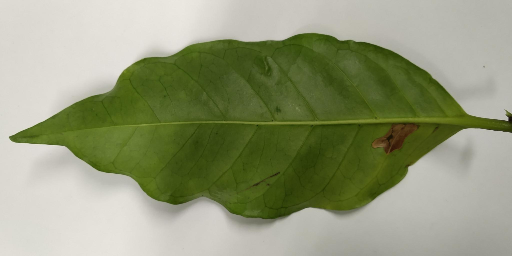

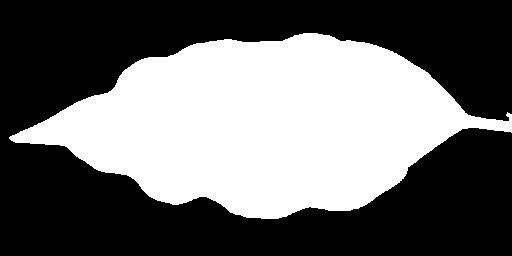

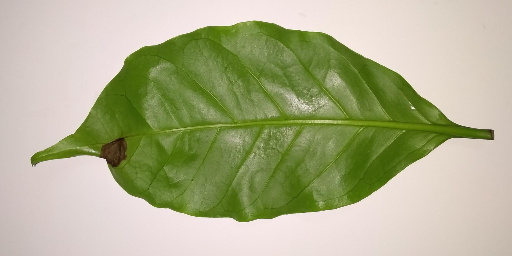

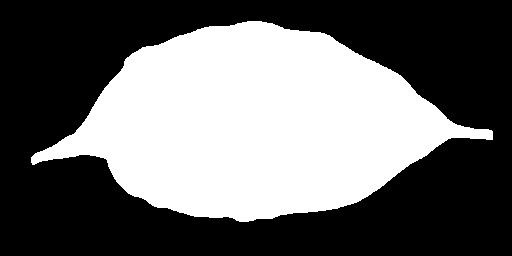

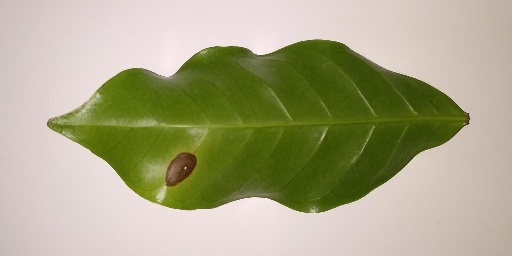

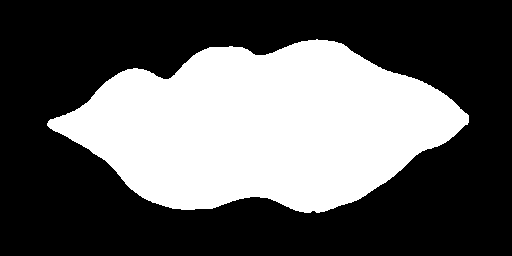

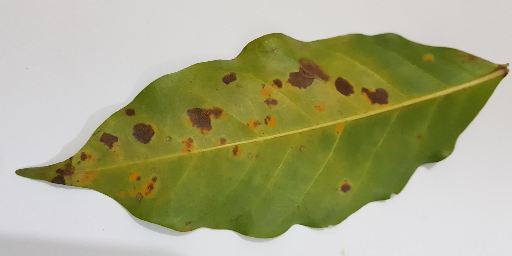

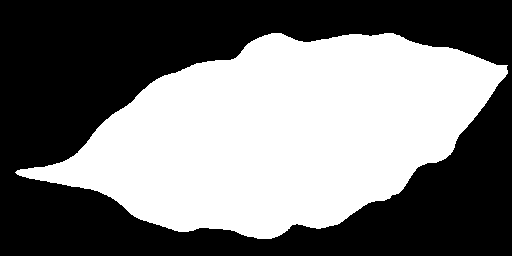

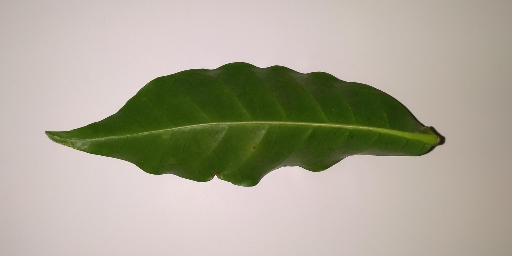

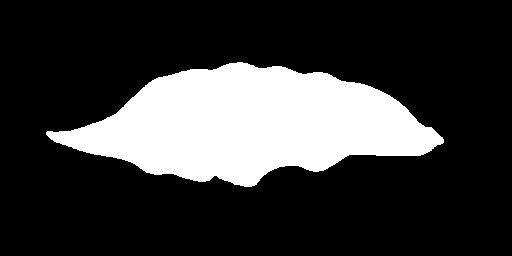

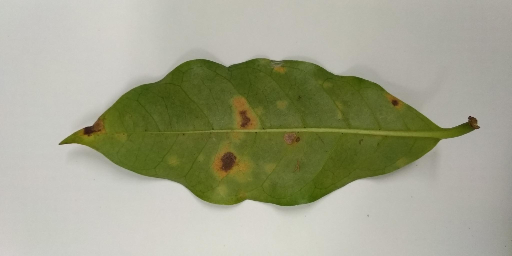

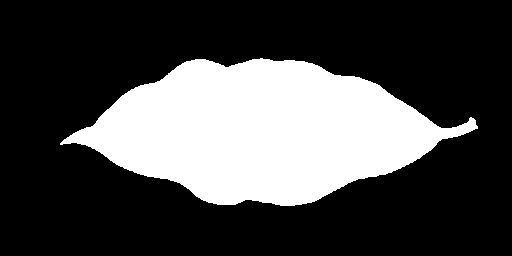

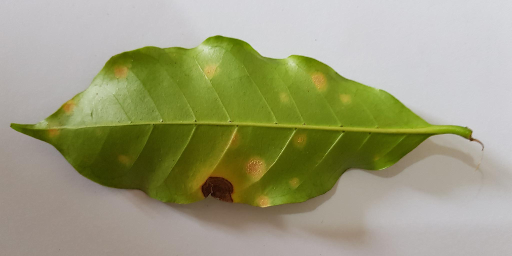

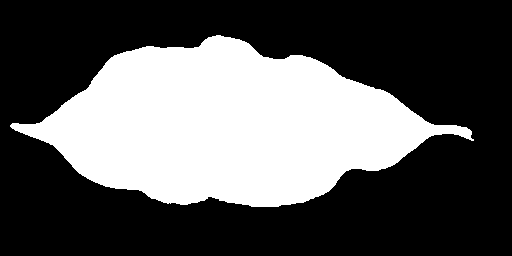

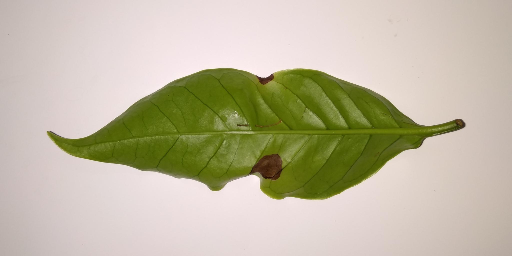

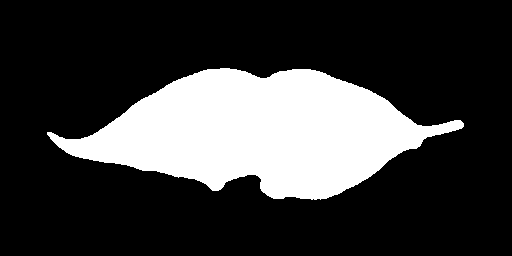

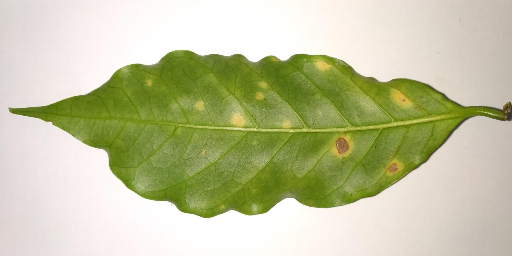

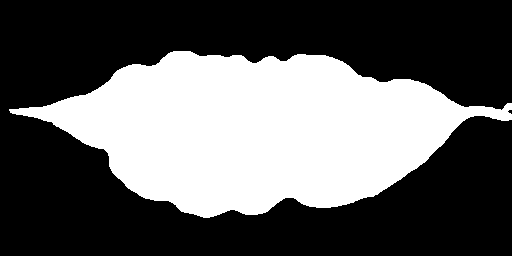

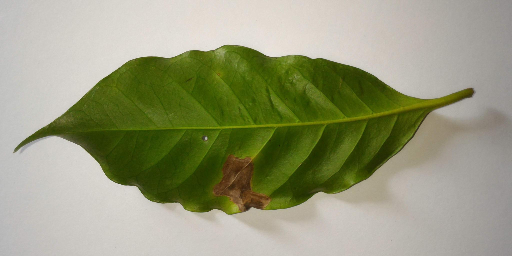

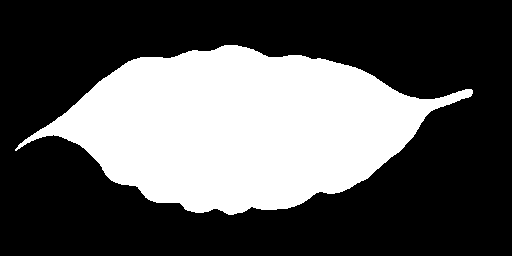

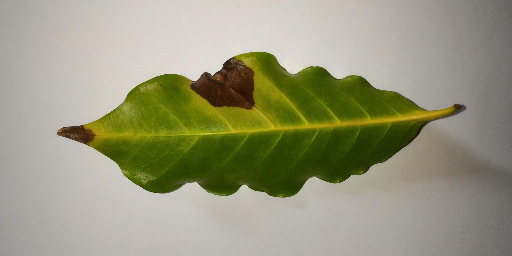

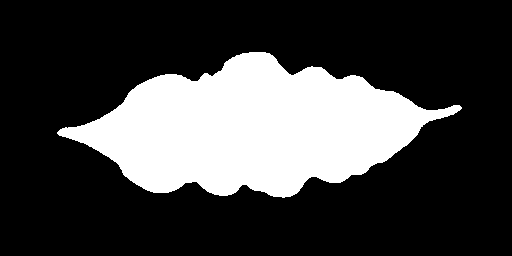

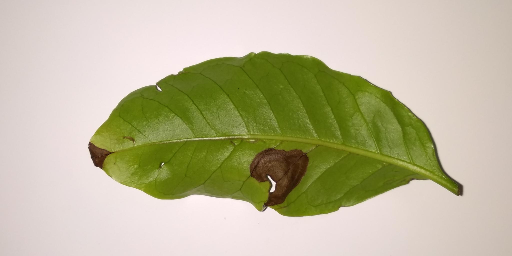

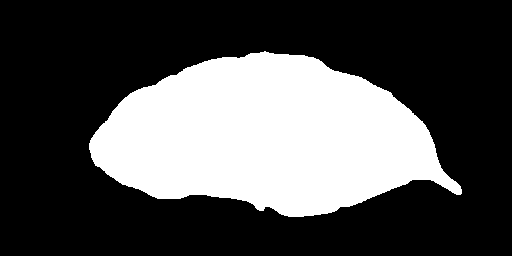

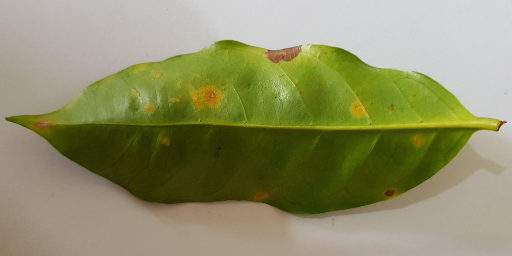

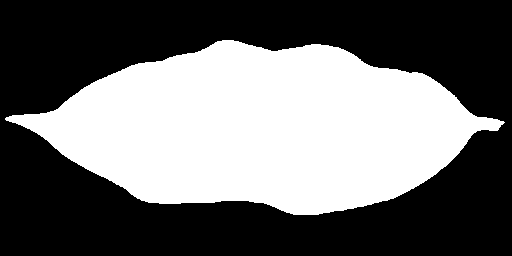

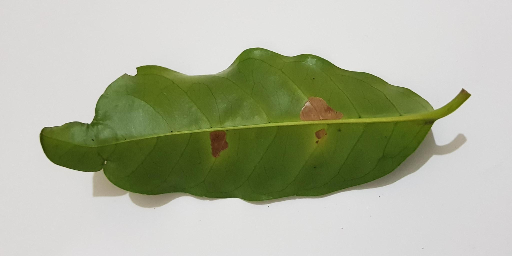

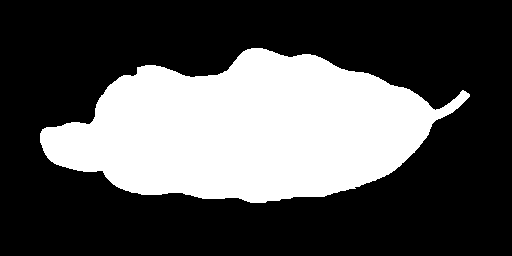

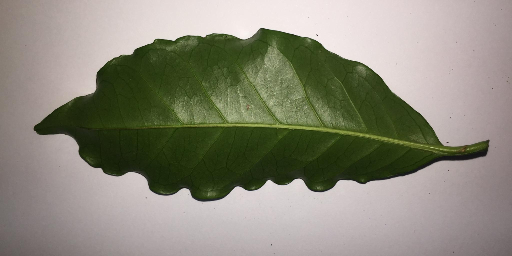

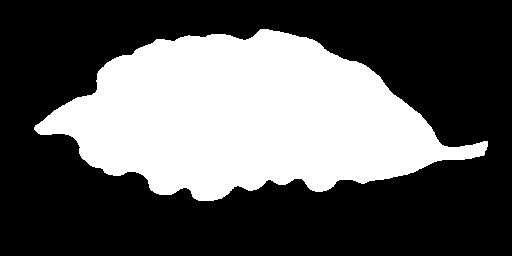

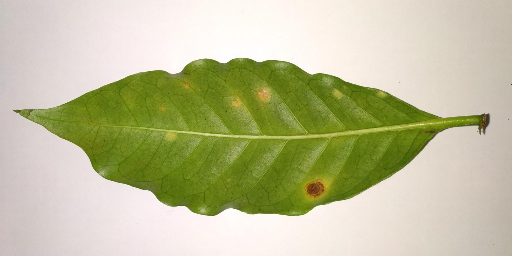

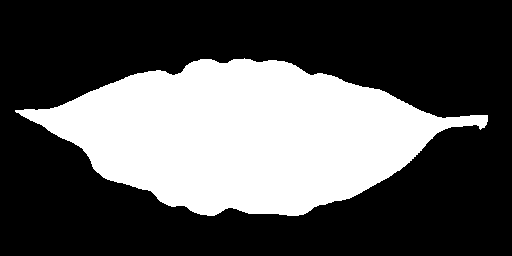

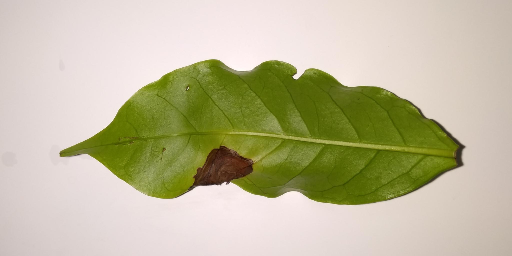

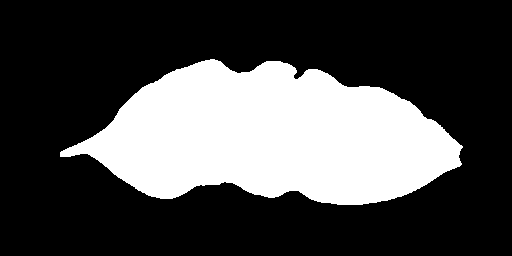

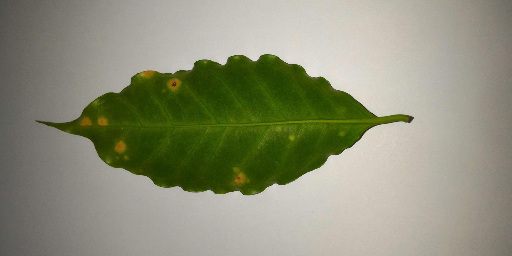

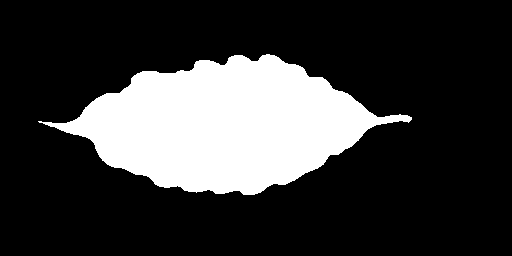

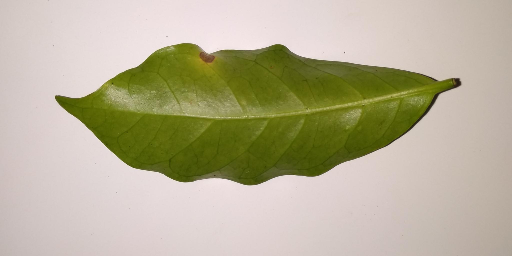

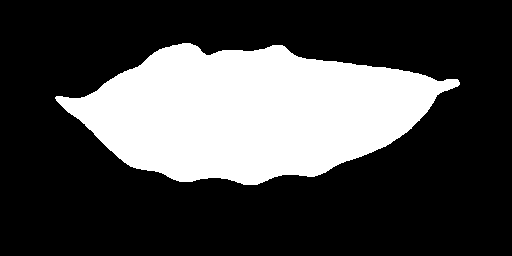

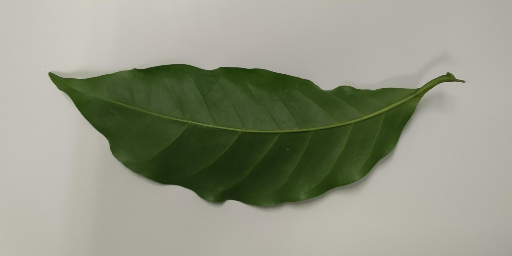

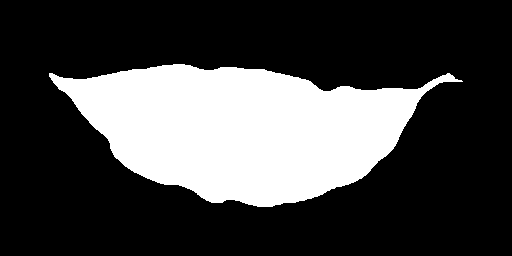

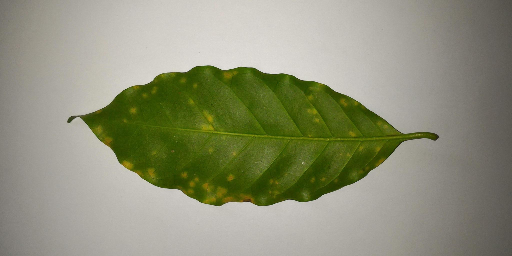

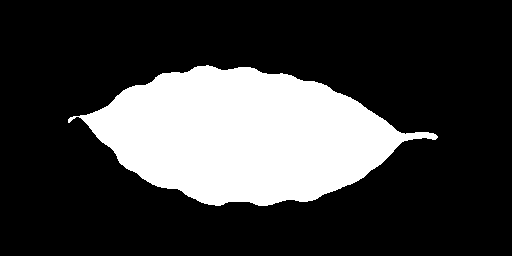

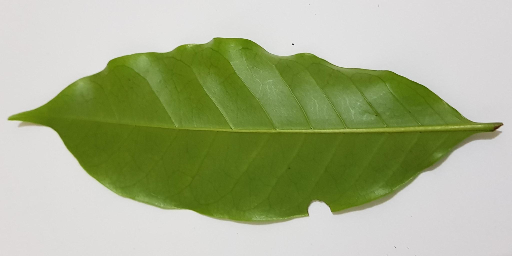

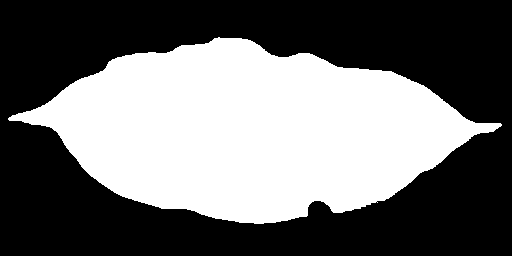

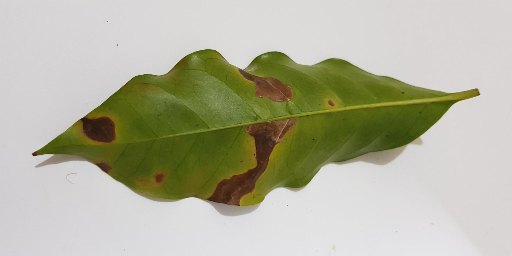

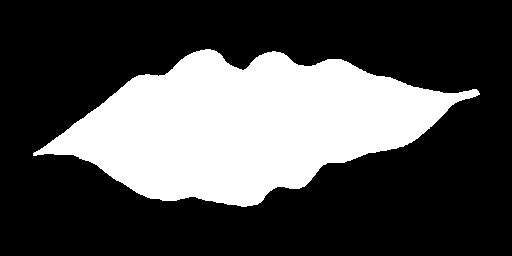

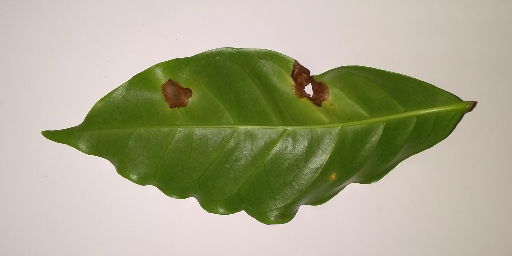

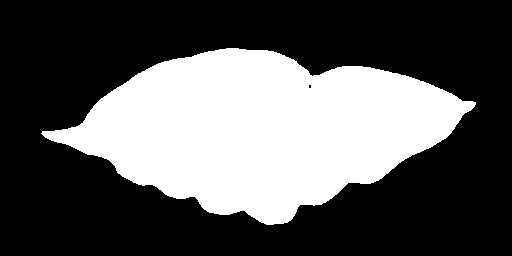

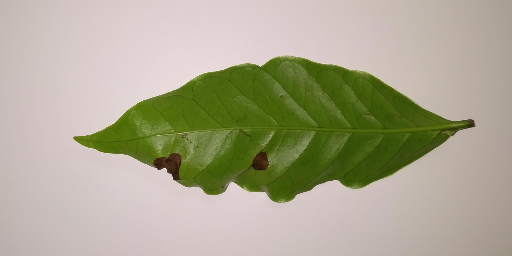

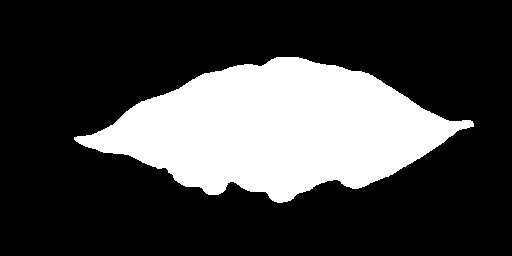

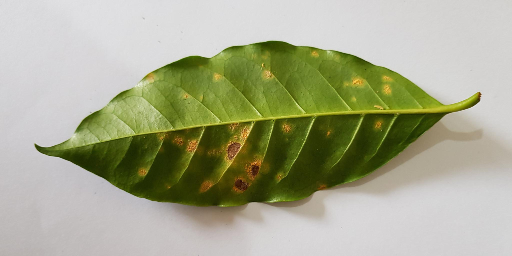

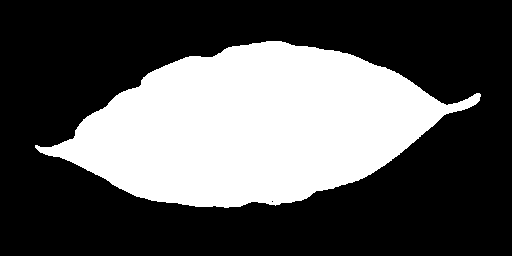

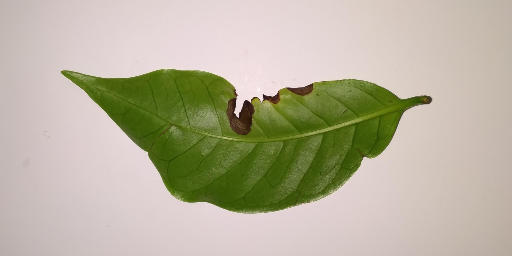

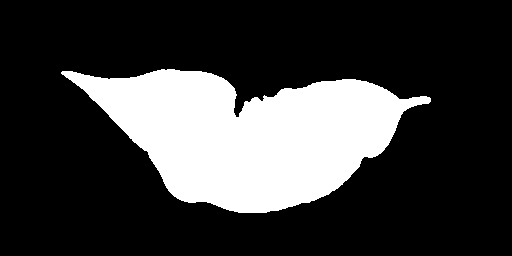

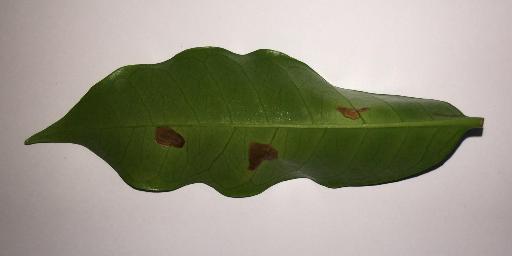

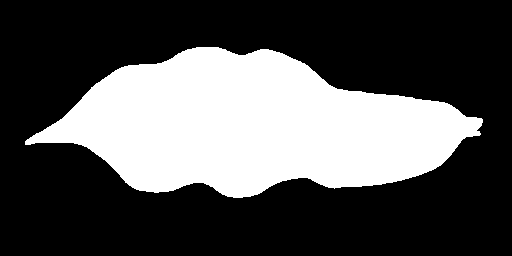

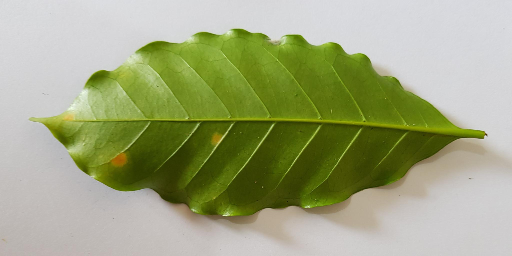

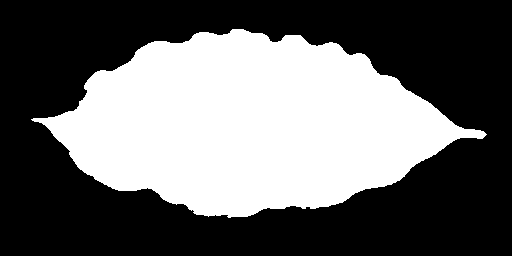

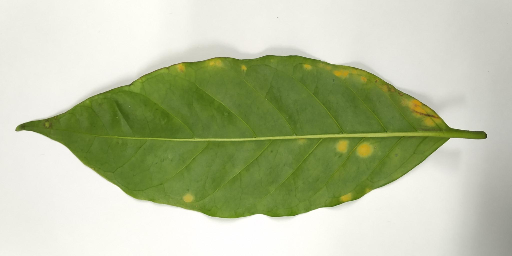

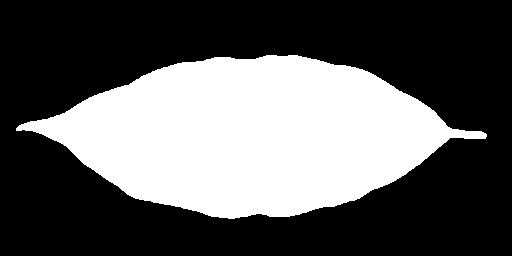

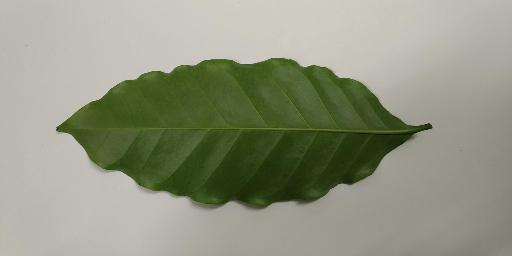

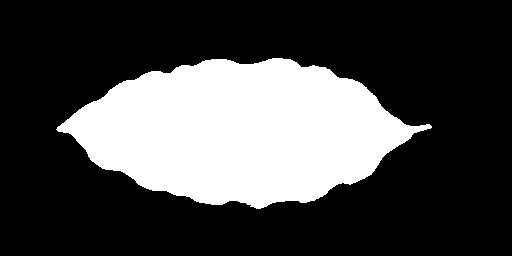

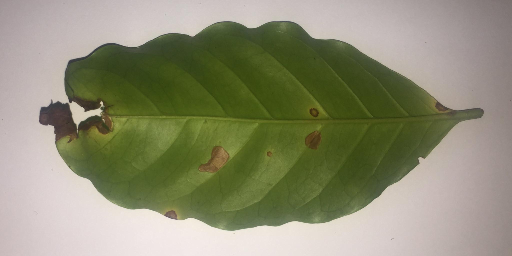

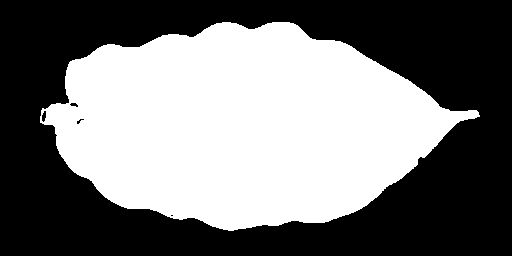

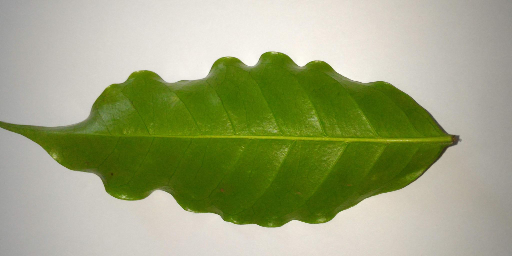

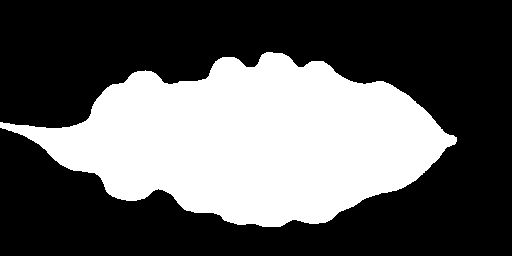

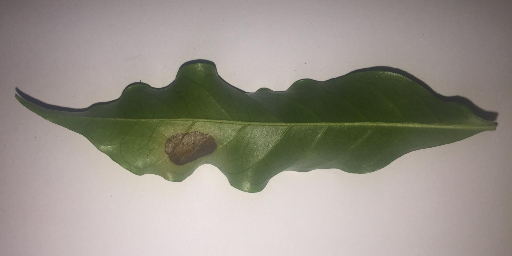

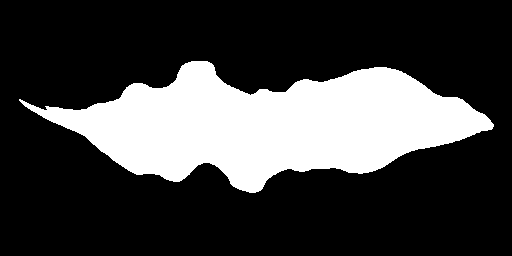

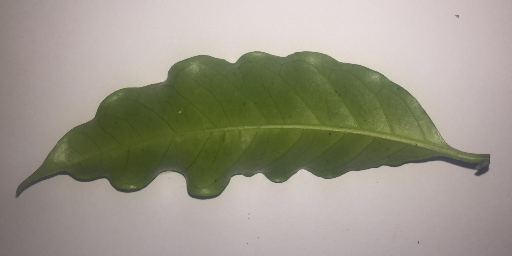

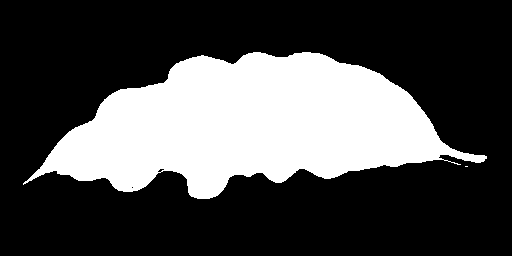

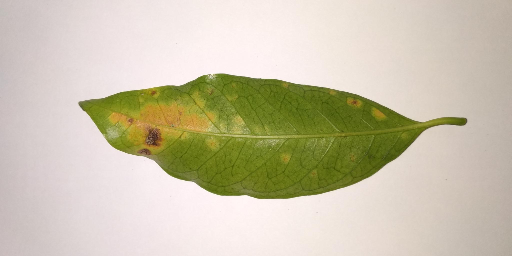

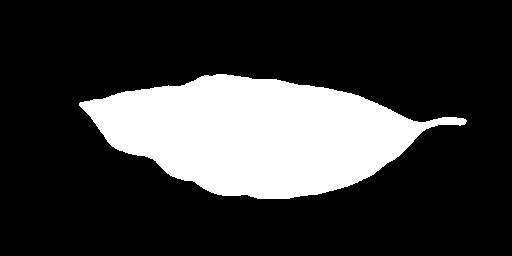

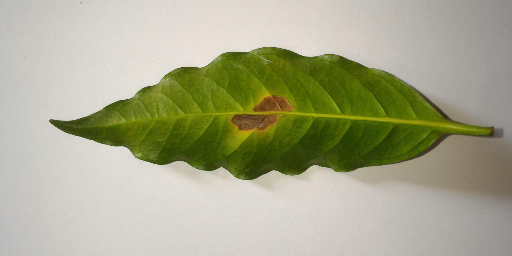

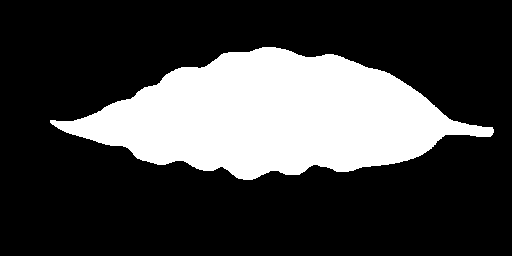

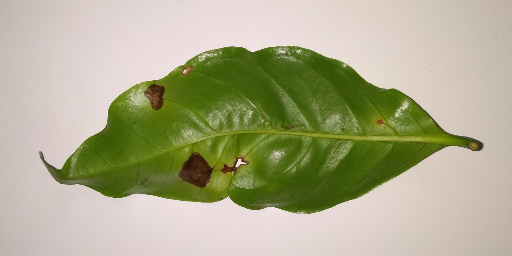

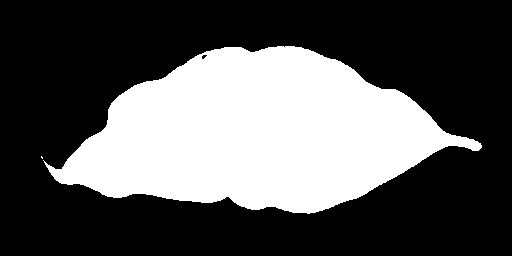

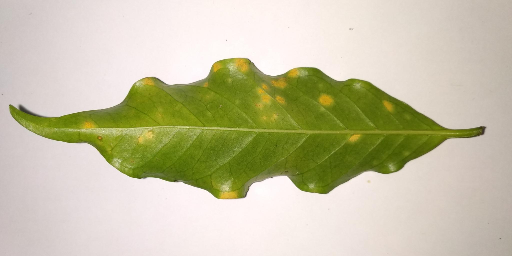

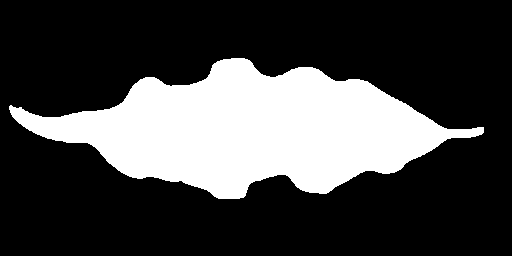

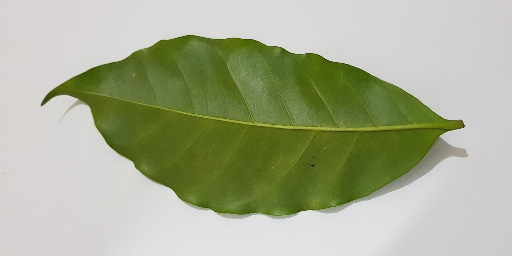

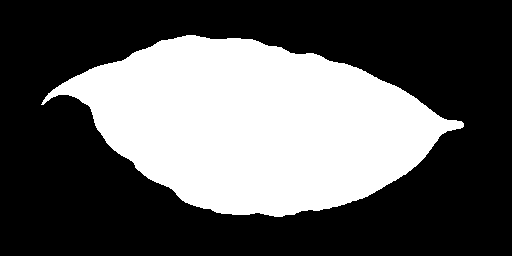

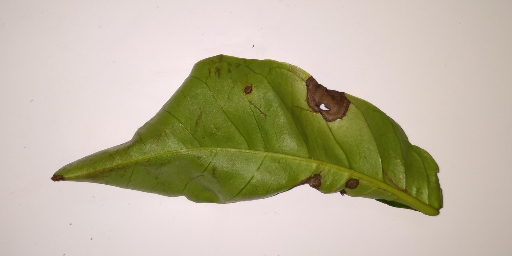

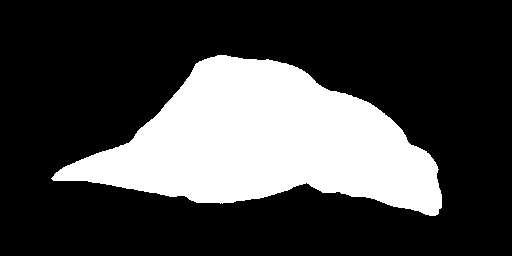

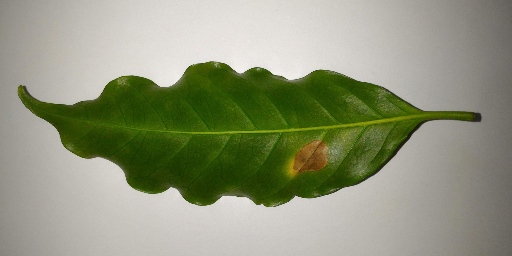

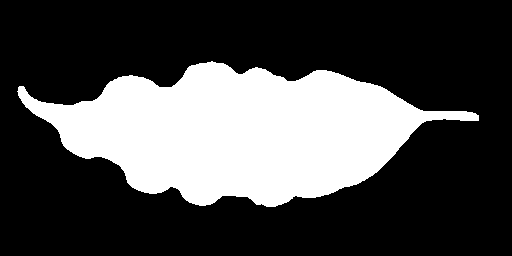

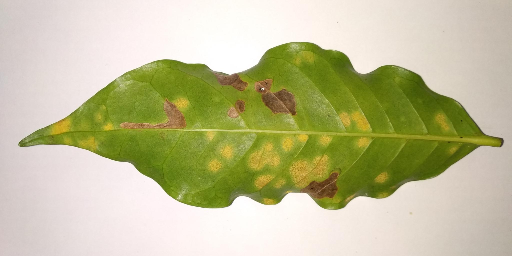

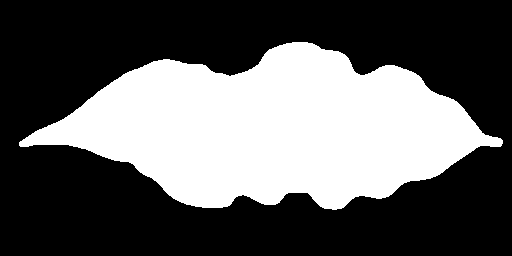

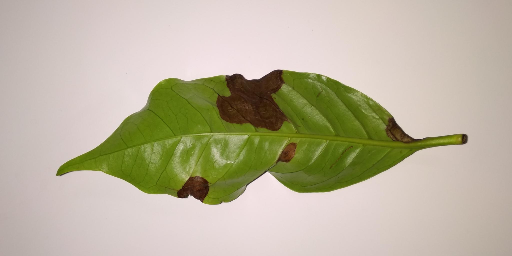

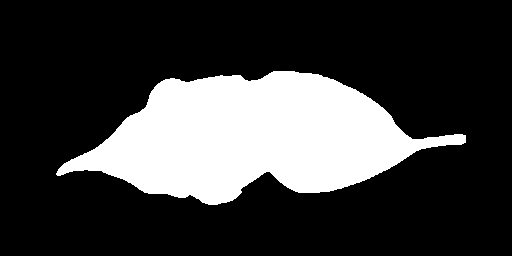

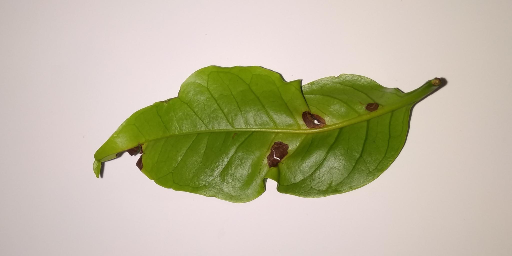

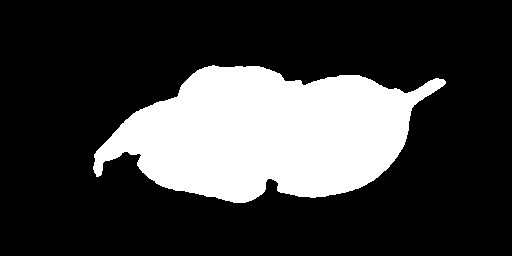

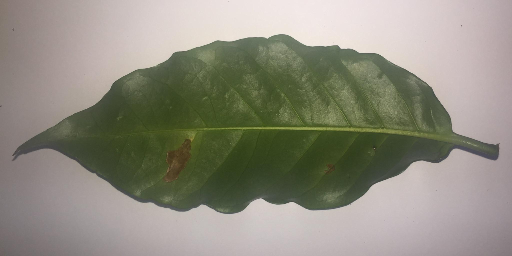

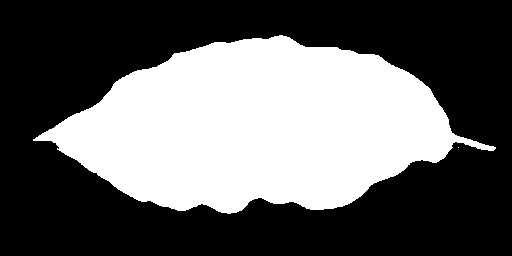

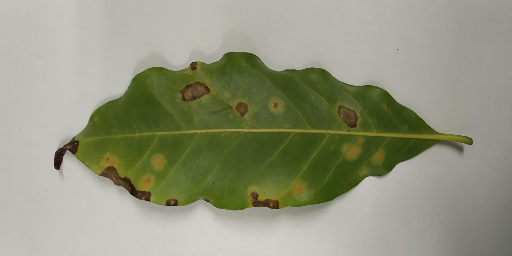

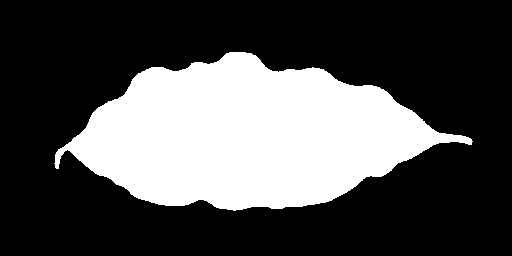

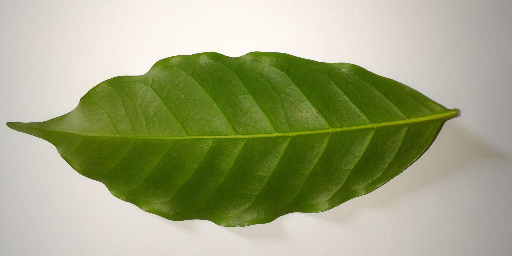

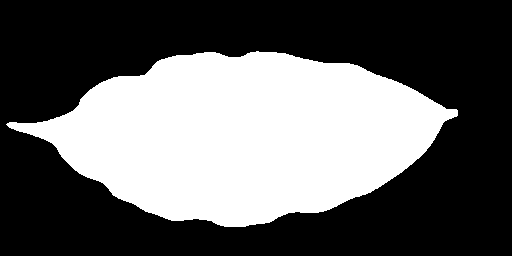

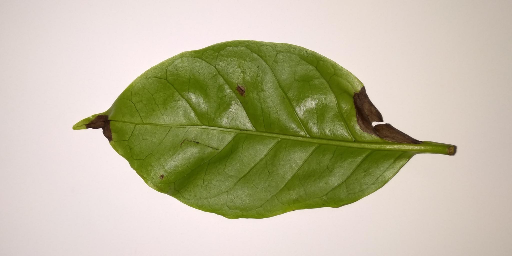

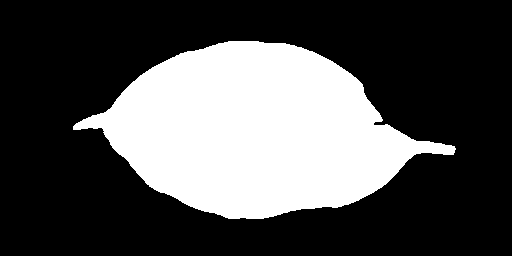

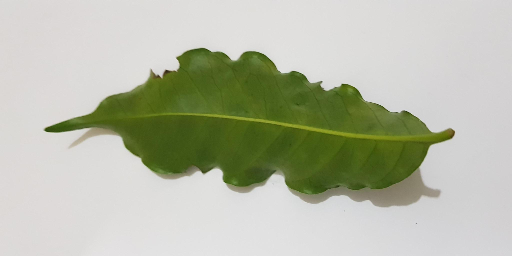

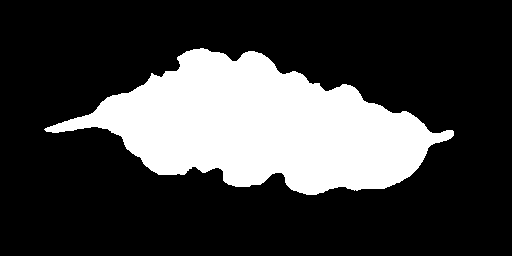

In [40]:
for index,img in enumerate(prediction):
  img=(img>=0.5)
  img = img.astype(int)
  img*=255
  cv2_imshow(val[0][index])
  cv2_imshow(img)

1/1 [==============================] - 0s 52ms/step


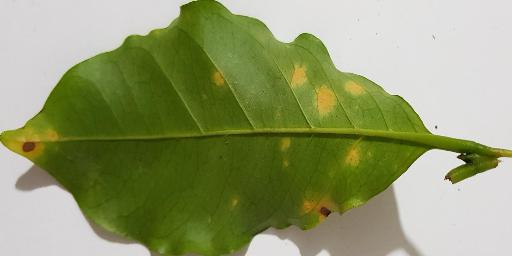

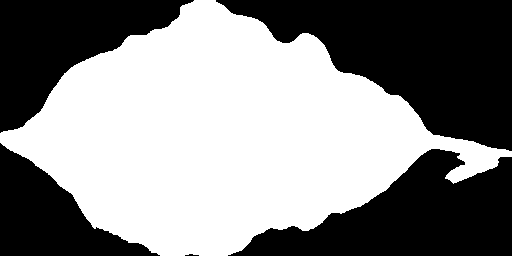

In [45]:
img_x=cv2.imread("/content/drive/MyDrive/dataset/leaf/1338.jpg")
# img_x=cv2.resize(img_x, (512, 256))
img_x=np.expand_dims(img_x,axis=0)
prediction=model.predict(img_x)
for index,img in enumerate(prediction):
  img=(img>=0.5)
  img = img.astype(int)
  img*=255
  cv2_imshow(img_x[0])
  cv2_imshow(img)